In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
device

device(type='cpu')

### Data

In [8]:
# Load CFashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0,), (1.0/255.0))])

trainset = torchvision.datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1024, num_workers=8, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1024, num_workers=8, shuffle=False)

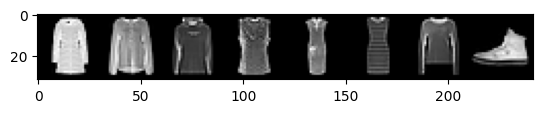

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display the images
def imshow(img):
    img = img / 255.0
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()
    
for i, (images, labels) in enumerate(trainloader, 0):
    # Plot some images
    imshow(torchvision.utils.make_grid(images[:8])) # Display 8 images from the batch
    break

### Model

In [10]:
model = nn.Sequential(
    nn.Flatten(), nn.Linear(784, 10)
)
model = model.to(device)

print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


In [11]:
# Generating a random tensor
input_tensor = torch.rand(5, 28, 28).to(device)

# Feeding the tensor into the model
output = model(input_tensor)
print(output.shape)

torch.Size([5, 10])


### Loss, Optimizer and Evaluation Function

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [19]:
# Function to compute loss and accuracy for test set
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            
            _,predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy

In [20]:
test_loss, test_accuracy = evaluate(model, testloader, criterion)
print(f'test_loss: {test_loss}')
print(f'test accuracy: {test_accuracy}')

test_loss: 118.83921432495117
test accuracy: 14.35


### Train

In [21]:
# Somae parameters
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
max_epoch = 100

In [22]:
# Train 
for epoch in range(max_epoch):
    running_loss = 0.0
    running_correct = 0     # to track numer of correct predictions
    total = 0               # to track total number of samples
    
    for i, (inputs, labels) in enumerate(trainloader, 0):
        # Move inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        
        # Determine class prediction and track accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()
        
        # backward pass and optimization
        loss.backward()
        optimizer.step()
        
    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, criterion)
    print(f"Epoch [{epoch + 1}/{max_epoch}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%]")
    
    # Save for plot
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/100, Loss: 4548.7722, Accuracy: 55.48%, Test Loss: 1447.3144, Test Accuracy: 66.29%]
Epoch [2/100, Loss: 1783.0954, Accuracy: 70.99%, Test Loss: 1040.8859, Test Accuracy: 77.09%]
Epoch [3/100, Loss: 1483.4243, Accuracy: 73.45%, Test Loss: 942.5860, Test Accuracy: 74.47%]
Epoch [4/100, Loss: 1277.4880, Accuracy: 74.28%, Test Loss: 1811.0918, Test Accuracy: 64.97%]
Epoch [5/100, Loss: 1241.6487, Accuracy: 74.82%, Test Loss: 1578.4467, Test Accuracy: 68.67%]
Epoch [6/100, Loss: 1142.0481, Accuracy: 75.80%, Test Loss: 1585.2317, Test Accuracy: 67.04%]
Epoch [7/100, Loss: 1182.7103, Accuracy: 76.11%, Test Loss: 681.2158, Test Accuracy: 77.93%]
Epoch [8/100, Loss: 1016.3717, Accuracy: 77.12%, Test Loss: 1002.3234, Test Accuracy: 73.40%]
Epoch [9/100, Loss: 1210.3253, Accuracy: 75.06%, Test Loss: 2516.7344, Test Accuracy: 68.94%]
Epoch [10/100, Loss: 918.0686, Accuracy: 78.68%, Test Loss: 2070.5697, Test Accuracy: 69.87%]
Epoch [11/100, Loss: 1195.5028, Accuracy: 75.61%, Test Loss: 1

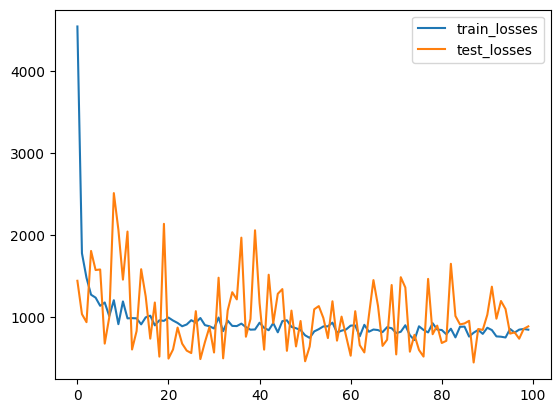

In [23]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

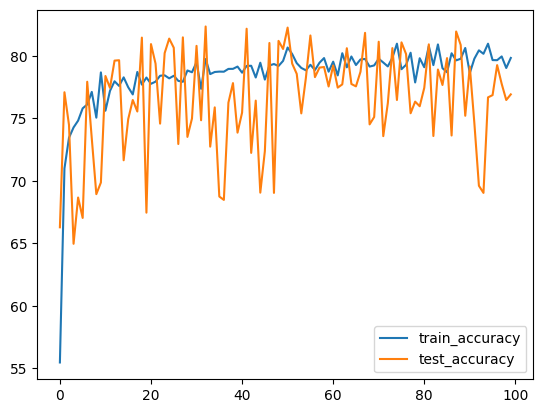

In [24]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()